# Fix pathing

In [1]:
import sys


sys.path.append("..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Imports

In [3]:
import matplotlib.pyplot as plt

import numpy as np


# Plot

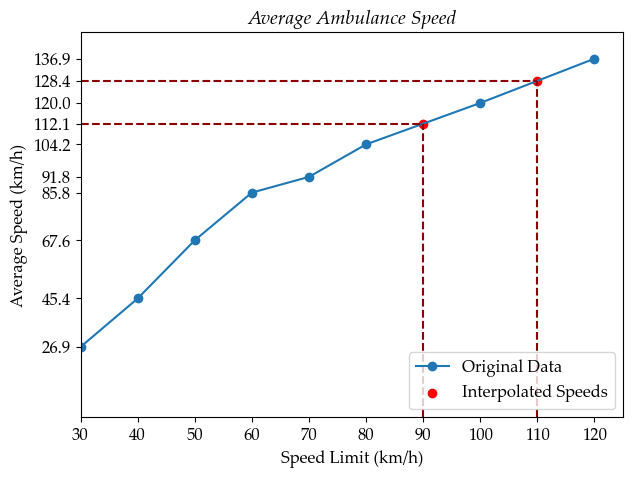

(112.1, 128.45)

In [4]:
def interpolate_speed(speed_limit, speed_dict):
    keys = np.array(list(speed_dict.keys()))
    values = np.array(list(speed_dict.values()))

    return np.interp(speed_limit, keys, values)


speeds_normal = {
    30: 26.9,
    40: 45.4,
    50: 67.6,
    60: 85.8,
    70: 91.8,
    80: 104.2,
    100: 120.0,
    120: 136.9
}

speed_90 = interpolate_speed(90, speeds_normal)
speed_110 = interpolate_speed(110, speeds_normal)

# Updating the plot to move the legend to the right side and slightly increase the x-axis limit

plt.figure(figsize=(7, 5))

# Plotting the original data
plt.plot(list(speeds_normal.keys()), list(speeds_normal.values()), marker='o', label='Original Data')

# Plotting the interpolated points
plt.scatter([90, 110], [speed_90, speed_110], color='red', label='Interpolated Speeds')

# Adding horizontal and vertical lines for the point at speed limit 90
# Horizontal line
plt.hlines(y=speed_90, xmin=30, xmax=90, color='darkred', linestyle='--')
# Vertical line
plt.vlines(x=90, ymin=0, ymax=speed_90, color='darkred', linestyle='--')

# Adding horizontal and vertical lines for the point at speed limit 110
# Horizontal line
plt.hlines(y=speed_110, xmin=30, xmax=110, color='darkred', linestyle='--')
# Vertical line
plt.vlines(x=110, ymin=0, ymax=speed_110, color='darkred', linestyle='--')

# Adding labels and title
title = 'Average Ambulance Speed'
plt.title(title, fontdict=constants.FONT_PROPERTIES_SUB_HEADER)
plt.xlabel('Speed Limit (km/h)')
plt.ylabel('Average Speed (km/h)')

# Moving the legend to the right side
plt.legend(loc='lower right')

# Setting the x-axis to include all speed limits starting from 30 and slightly increasing the limit
plt.xticks(list(speeds_normal.keys()) + [90, 110])
plt.xlim(30, 125)  # Set the x-axis limit to start from 30 and extend a bit beyond 120

# Adjusting the y-axis scale for better readability and adding specific values for interpolated speeds
y_values = list(speeds_normal.values()) + [speed_90, speed_110]
y_max = max(y_values) + 10  # Increase the maximum limit for y-axis
plt.ylim(0, y_max)  # Set the y-axis limits

# Adding specific y-axis values for the interpolated speeds
plt.yticks(sorted(set(y_values)))

plt.savefig(os.path.join(constants.PROJECT_DIRECTORY_PATH, "source", "analysis", "plots", title + ".png"), dpi=300, bbox_inches='tight')

plt.show()



speed_90, speed_110